# IPL_DATA_ANALYSIS

## Data analysis on IPL-T20 MATCHES (2008-2017)

__Indian Premier League is one of the most popular cricket leagues. We find commentators often explaining player’s performance, strike rate against a particular bowler and even match winning percentages based on tons and tons of match data collected.The purpose of this project is to analyze the IPL T-20 matches data so far and extract some productive information with regards to players and each team.__

## This project coverd the followings:
    *  Tosses and Matches won by each team
    *  Stadiums with maximum match occurance
    *  Count of bat/bowl decision by each team on winning the toss
    *  Top run scorers
    *  Number of matches played by each team
    *  Probablity of winning the match by winning the toss
    *  Percentage of teams electing to bat in every season
    *  Number of man of the match awards received by each player
    *  Strike Rate of batsmen
    *  Average score of batsmen
    *  Top wicket taker

In [113]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [114]:
df="matches.csv"
data = pd.read_csv(df)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [115]:
data.shape

(756, 18)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [117]:
data.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [118]:
data[data.player_of_match=='AB de Villiers'].head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
124,125,2009,Durban,2009-04-23,Delhi Daredevils,Chennai Super Kings,Delhi Daredevils,bat,normal,0,Delhi Daredevils,9,0,AB de Villiers,Kingsmead,BR Doctrove,SJA Taufel,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN
236,237,2011,Kochi,2011-04-09,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,6,AB de Villiers,Nehru Stadium,HDPK Dharmasena,K Hariharan,NaN
311,312,2012,Bangalore,2012-04-07,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN
337,338,2012,Jaipur,2012-04-23,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Royal Challengers Bangalore,46,0,AB de Villiers,Sawai Mansingh Stadium,Asad Rauf,S Asnani,NaN


In [119]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [120]:
data.drop(['umpire3'],axis=1).head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [121]:
data.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [122]:
print("Teams before preprocessing:",data.team1.unique())
data=data.replace('Rising Pune Supergiant','Rising Pune Supergiants')
data=data.replace('Delhi Daredevils','Delhi Capitals')
print()
print("Teams after preprocessing:",data.team1.unique())

Teams before preprocessing: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']

Teams after preprocessing: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']


In [123]:
Team1=data.team1.value_counts()

In [124]:
Team2=data.team2.value_counts()

In [125]:
TEAM =Team1+Team2
print("THE TOTAL MATCHES PLAYED BY EACH TEAM THROGH OUT THE SEASON ARE:")
TEAM

THE TOTAL MATCHES PLAYED BY EACH TEAM THROGH OUT THE SEASON ARE:


Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiants         30
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [126]:
matches_per_season=data.groupby('season')['season'].count()

In [127]:
#import plotly
from matplotlib import pyplot as plt
#import plotly
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import matplotlib as cm
from math import log10
from matplotlib.colors import rgb2hex


In [128]:
seasons=data['season'].unique()
teams=data['team1'].unique()
seasons,teams

(array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
        2019], dtype=int64),
 array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
        'Rising Pune Supergiants', 'Royal Challengers Bangalore',
        'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
        'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
        'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object))

Text(0, 0.5, 'Percentage')

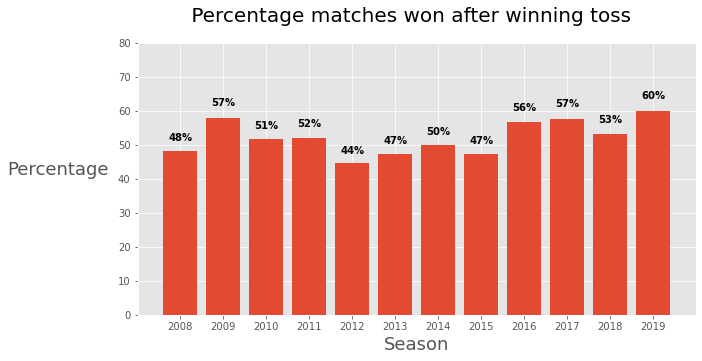

In [129]:
seasons=data['season'].unique()
teams=data['team1'].unique()
seasons=np.sort(seasons)
perc_win=[]
data_toss_match_winner=data[data['toss_winner']==data['winner']]
data_toss_match_winner_season=data_toss_match_winner.groupby('season')['season'].count()
data_toss_match_winner_team=data_toss_match_winner.groupby('winner')['winner'].count()

for i in seasons:
    perc_win.append((data_toss_match_winner_season[i]/matches_per_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,perc_win)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')

fig.suptitle(' Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

In [130]:
data.groupby('toss_winner')['toss_winner'].count()


toss_winner
Chennai Super Kings            89
Deccan Chargers                43
Delhi Capitals                 90
Gujarat Lions                  15
Kings XI Punjab                81
Kochi Tuskers Kerala            8
Kolkata Knight Riders          92
Mumbai Indians                 98
Pune Warriors                  20
Rajasthan Royals               80
Rising Pune Supergiants        13
Royal Challengers Bangalore    81
Sunrisers Hyderabad            46
Name: toss_winner, dtype: int64

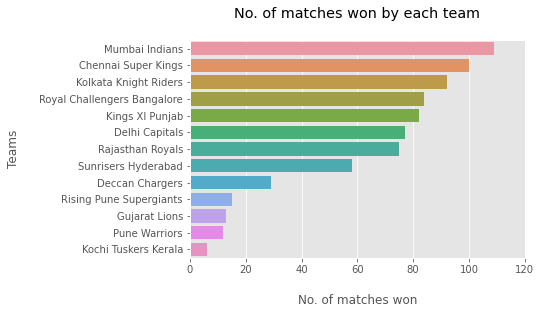

In [165]:
data=data['winner'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,120])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of matches won by each team\n')
plt.xlabel("\nNo. of matches won")
plt.ylabel('Teams\n')
plt.show()

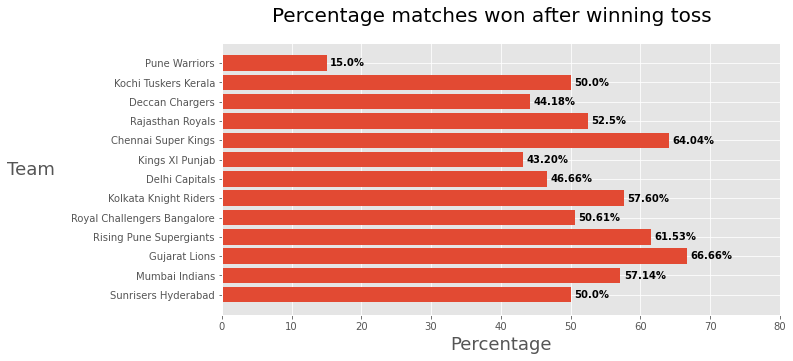

In [131]:
toss_wins=data.groupby('toss_winner')['toss_winner'].count()
perc_win=[]
for i in teams:
    perc_win.append((data_toss_match_winner_team[i]/toss_wins[i])*100)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,80)
rects=plt.barh(teams,perc_win)
for i, v in enumerate(perc_win):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')


fig.suptitle('Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)



plt.show()

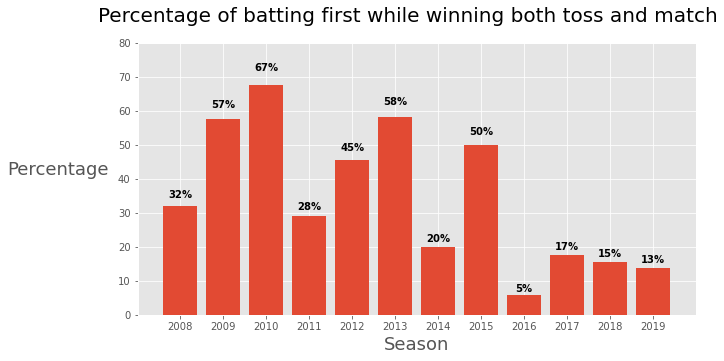

In [132]:
toss_batting_first=data[(data['toss_winner']==data['winner']) & (data['toss_decision']=='bat')]
toss_batting_first_season=toss_batting_first.groupby('season')['season'].count()
win_perc=[]

for i in seasons:
    win_perc.append((toss_batting_first_season[i]/data_toss_match_winner_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,win_perc)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')

    
fig.suptitle('Percentage of batting first while winning both toss and match',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

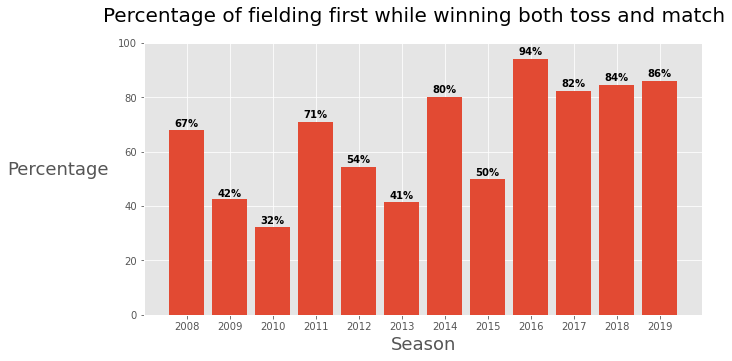

In [133]:
toss_field_first=data[(data['toss_winner']==data['winner']) & (data['toss_decision']=='field')]
toss_field_first_season=toss_field_first.groupby('season')['season'].count()
win_perc=[]

for i in seasons:
    win_perc.append((toss_field_first_season[i]/data_toss_match_winner_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,100)
rects=plt.bar(seasons,win_perc)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.01*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')

    
fig.suptitle('Percentage of fielding first while winning both toss and match',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

In [134]:
del_data=pd.read_csv('deliveries.csv')
del_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [135]:
del_data=del_data.replace('Rising Pune Supergiant','Rising Pune Supergiants')
del_data=del_data.replace('Delhi Daredevils','Delhi Capitals')
del_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [136]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [137]:
del_data=del_data[del_data['is_super_over']==0]
del_data['wicket']=(del_data['player_dismissed'].notnull()).astype('int')

In [138]:
del_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,0


In [139]:
del_data['wicket']==1

0         False
1         False
2         False
3         False
4         False
          ...  
179073    False
179074    False
179075     True
179076    False
179077     True
Name: wicket, Length: 178997, dtype: bool

In [140]:
del_data['wicket']=(del_data['player_dismissed'].notnull()).astype('int')

In [141]:
del_data['over'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [142]:
overs=del_data.groupby(by="over")['over'].count()/6
over_runs=del_data.groupby('over').agg({'total_runs': 'sum'}).total_runs

run_rate_over=over_runs/overs

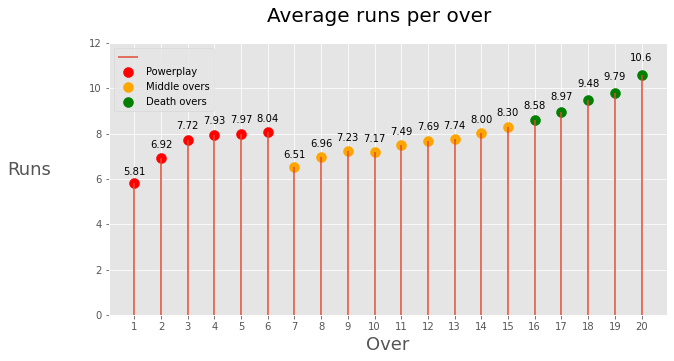

In [163]:
fig=plt.figure(figsize=(10,5))
plt.ylim(0,12)
rects=plt.bar(run_rate_over.keys(),run_rate_over.values,width=0)
plt.xticks(run_rate_over.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(height)[:4],ha='center', va='bottom',color='black')
    
plt.vlines(run_rate_over.keys(),0,run_rate_over.values,linestyles='solid')
plt.scatter(run_rate_over.keys()[:6],run_rate_over.values[:6], marker="o",s=100,color="red")
plt.scatter(run_rate_over.keys()[6:15],run_rate_over.values[6:15], marker="o",s=100,color="orange")
plt.scatter(run_rate_over.keys()[15:],run_rate_over.values[15:], marker="o",s=100,color="green")
    
fig.suptitle('Average runs per over',fontsize=20)
plt.xlabel('Over', fontsize=18)
plt.ylabel('Runs', fontsize=18,rotation=0,labelpad=60)

plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()

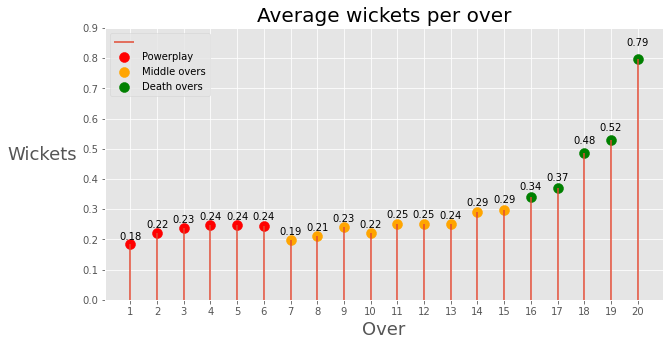

In [145]:
over_wickets=del_data.groupby('over').agg({'wicket': 'sum'}).wicket
wpo=over_wickets/overs

ig=plt.figure(figsize=(10,5))
plt.ylim(0,0.9)
rects=plt.bar(wpo.keys(),wpo.values,width=0)
plt.xticks(wpo.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(height)[:4],ha='center', va='bottom',color='black')
    
plt.vlines(wpo.keys(),0,wpo.values,linestyles='solid')
plt.scatter(wpo.keys()[:6],wpo.values[:6], marker="o",s=100,color="red")
plt.scatter(wpo.keys()[6:15],wpo.values[6:15], marker="o",s=100,color="orange")
plt.scatter(wpo.keys()[15:],wpo.values[15:], marker="o",s=100,color="green")
   

fig.suptitle('Average wickets per over',fontsize=20)

plt.xlabel('Over', fontsize=18)
plt.ylabel('Wickets', fontsize=18,rotation=0,labelpad=40)
plt.title('Average wickets per over',fontsize=20)
plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()

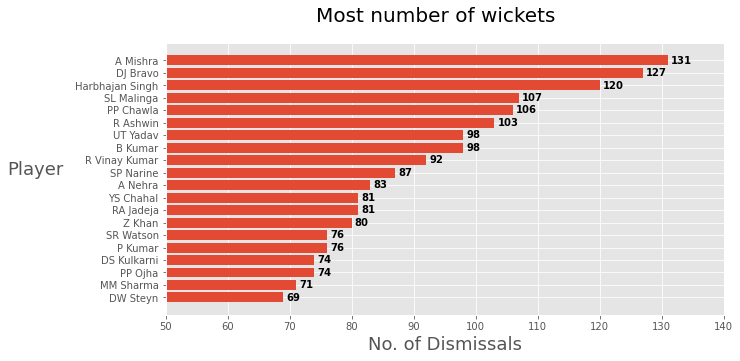

In [160]:
bowler_wicket=del_data[del_data["dismissal_kind"].isin(["caught", "bowled ", "lbw","stumped","caught and bowled" ])]
bowler_wicket=bowler_wicket.groupby('bowler')['bowler'].count()
bowler_wicket=bowler_wicket.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(50,140)
rects=plt.barh(bowler_wicket.keys(),bowler_wicket.values)

for i, v in enumerate(bowler_wicket.values):
    ax.text(v+0.5 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Most number of wickets',fontsize=20)
plt.xlabel('No. of Dismissals', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)


plt.show()


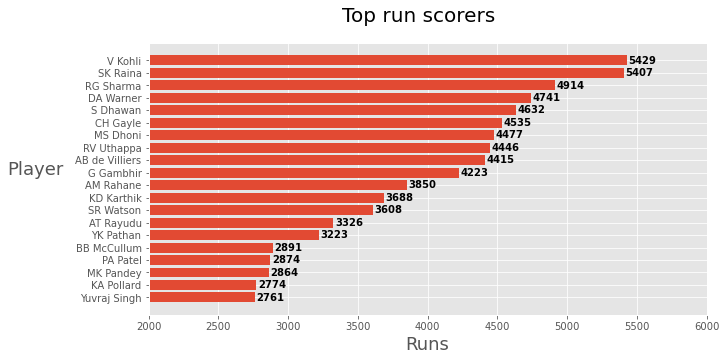

In [161]:
batsmen_runs=del_data.groupby('batsman').agg({'batsman_runs': 'sum'}).batsman_runs
most_runs=batsmen_runs.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(2000,6000)
rects=plt.barh(most_runs.keys(),most_runs.values)

for i, v in enumerate(most_runs.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Top run scorers',fontsize=20)
plt.xlabel('Runs', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

plt.show()

# The End!